In [6]:
class Value:
    def __init__(self, data, _children=(), _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data+other.data, (self, other),'+')
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data, (self, other),'*')
        return out
    
a = Value(2)
b = Value(-3)
c = Value(10)
d = a*b + c*a
d


Value(data=14)

In [7]:
d._prev

{Value(data=-6), Value(data=20)}

In [8]:
d._op

'+'

In [9]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid,label="{ data %.4f }" % (n.data, ), shape='record')
        if n._op:
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2))+n2._op)
    return dot

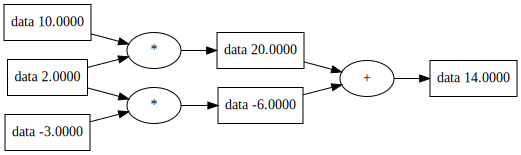

In [10]:
draw_dot(d)